In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path
import xhermes as xh

sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/sdtools"))

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.fluxes import *


%load_ext autoreload
%autoreload 2


In [2]:
neon_val = 0.02
sh_ds = Load.case_1D(
    f'/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/updated_flux_limitation/2024-03-25_wigram_reference_glover_comparison_FINAL/alpha_-1/neon_{neon_val}').ds.isel(t=-1)

snb_ds = Load.case_1D(
    f'/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/updated_flux_limitation/2024-03-25_wigram_reference_glover_comparison_FINAL/alpha_snb/neon_{neon_val}').ds.isel(t=-1)

fl02_ds = Load.case_1D(
    f'/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/updated_flux_limitation/2024-03-25_wigram_reference_glover_comparison_FINAL/alpha_0.2/neon_{neon_val}').ds.isel(t=-1)

fl006_ds = Load.case_1D(
    f'/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/updated_flux_limitation/2024-03-25_wigram_reference_glover_comparison_FINAL/alpha_0.06/neon_{neon_val}').ds.isel(t=-1)

# snb_ds = Load.case_1D('/shared/storage/plasmahwdisks/data/jlb647/simulation_data/flux_limiter_detachment/2024-05_SHvsSNB_lower_power_higher_up-den/alpha_snb/neon_0.0').ds


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(
/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(
/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(
/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


In [3]:
print(sh_ds['Rneon'])

<xarray.DataArray 'Rneon' (pos: 804)>
dask.array<getitem, shape=(804,), dtype=float64, chunksize=(27,), chunktype=numpy.ndarray>
Coordinates:
    dx       (pos) float64 dask.array<chunksize=(27,), meta=np.ndarray>
    dy       (pos) float64 dask.array<chunksize=(27,), meta=np.ndarray>
    dz       (pos) float64 dask.array<chunksize=(27,), meta=np.ndarray>
    t        float64 3e+06
  * pos      (pos) float64 -0.2495 0.0 0.08313 0.2492 ... 69.99 70.0 70.0 70.01
Attributes:
    current_time_index:  601
    cell_location:       CELL_CENTRE
    conversion:          15346982899.153515
    direction_y:         Standard
    direction_z:         Standard
    long_name:           Radiation cooling neon
    source:              fixed_fraction_radiation
    time_dimension:      t
    units:               W / m^3
    metadata:            {'BOUT_VERSION': 5.2, 'Bnorm': 1.0, 'Cs0': 97871.514...
    options:             # 1D system with:\n#  - no-flow boundary on lower Y ...
    geometry:            

In [5]:
print(sh_ds['t'].conversion)

print('spitzer-harm sim_time',sh_ds['t'].values[-1] * sh_ds['t'].conversion)
print('spiter-harm wall time', '1 h 22 m 2 s')

print('snb sim_time',snb_ds['t'].values[-1] * snb_ds['t'].conversion)
print('snb wall time', '9 h 46 m 57 s')

print('fl02 sim_time',fl02_ds['t'].values[-1] * fl02_ds['t'].conversion)
print('fl02 wall time', ' 42 m 10 s')

print('fl006 sim_time',fl006_ds['t'].values[-1] * fl006_ds['t'].conversion)
print('fl006 wall time', ' 40 m 35 s')



1.0439684754508785e-08
[      0.    5000.   10000.   15000.   20000.   25000.   30000.   35000.
   40000.   45000.   50000.   55000.   60000.   65000.   70000.   75000.
   80000.   85000.   90000.   95000.  100000.  105000.  110000.  115000.
  120000.  125000.  130000.  135000.  140000.  145000.  150000.  155000.
  160000.  165000.  170000.  175000.  180000.  185000.  190000.  195000.
  200000.  205000.  210000.  215000.  220000.  225000.  230000.  235000.
  240000.  245000.  250000.  255000.  260000.  265000.  270000.  275000.
  280000.  285000.  290000.  295000.  300000.  305000.  310000.  315000.
  320000.  325000.  330000.  335000.  340000.  345000.  350000.  355000.
  360000.  365000.  370000.  375000.  380000.  385000.  390000.  395000.
  400000.  405000.  410000.  415000.  420000.  425000.  430000.  435000.
  440000.  445000.  450000.  455000.  460000.  465000.  470000.  475000.
  480000.  485000.  490000.  495000.  500000.  505000.  510000.  515000.
  520000.  525000.  530000. 

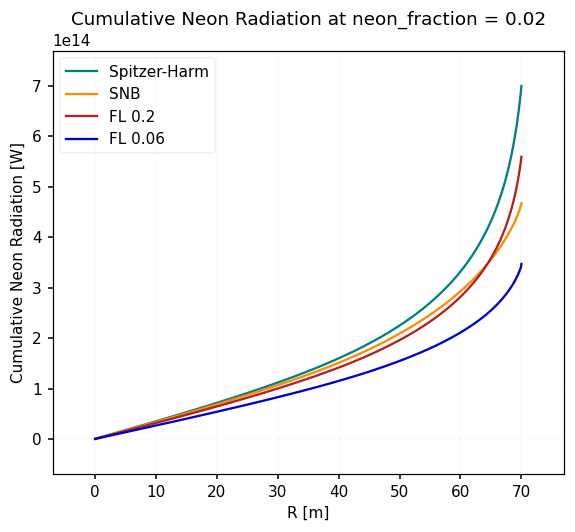

In [15]:

cum_rad_sh = (sh_ds.isel(pos=slice(2,-2))["Rneon"] * sh_ds["dv"]).cumsum("pos")
cum_rad_snb = (snb_ds.isel(pos=slice(2,-2))["Rneon"] * snb_ds["dv"]).cumsum("pos")
cum_rad_fl02 = (fl02_ds.isel(pos=slice(2,-2))["Rneon"] * fl02_ds["dv"]).cumsum("pos")
cum_rad_fl006 = (fl006_ds.isel(pos=slice(2,-2))["Rneon"] * fl006_ds["dv"]).cumsum("pos")

x = sh_ds["pos"].values[2:-2]

fig, ax = plt.subplots()
cum_rad_sh.plot(ax=ax, label='Spitzer-Harm')
cum_rad_snb.plot(ax=ax, label='SNB')
cum_rad_fl02.plot(ax=ax, label='FL 0.2')
cum_rad_fl006.plot(ax=ax, label='FL 0.06')
plt.xlabel('R [m]')
plt.ylabel('Cumulative Neon Radiation [W]')
plt.title(f'Cumulative Neon Radiation at neon_fraction = {neon_val}')
plt.legend()


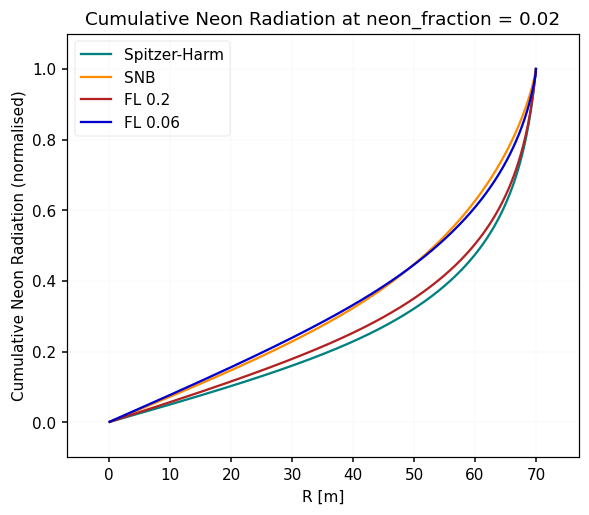

In [21]:
cum_rad_sh = (sh_ds.isel(pos=slice(2,-2))["Rneon"] * sh_ds["dv"]).cumsum("pos")
cum_rad_snb = (snb_ds.isel(pos=slice(2,-2))["Rneon"] * snb_ds["dv"]).cumsum("pos")
cum_rad_fl02 = (fl02_ds.isel(pos=slice(2,-2))["Rneon"] * fl02_ds["dv"]).cumsum("pos")
cum_rad_fl006 = (fl006_ds.isel(pos=slice(2,-2))["Rneon"] * fl006_ds["dv"]).cumsum("pos")


cum_rad_sh_normalized = cum_rad_sh / cum_rad_sh.max()
cum_rad_snb_normalized = cum_rad_snb / cum_rad_snb.max()
cum_rad_fl02_normalized = cum_rad_fl02 / cum_rad_fl02.max()
cum_rad_fl006_normalized = cum_rad_fl006 / cum_rad_fl006.max()


x = sh_ds["pos"].values[2:-2]

fig, ax = plt.subplots()
cum_rad_sh_normalized.plot(ax=ax, label='Spitzer-Harm')
cum_rad_snb_normalized.plot(ax=ax, label='SNB')
cum_rad_fl02_normalized.plot(ax=ax, label='FL 0.2')
cum_rad_fl006_normalized.plot(ax=ax, label='FL 0.06')
plt.xlabel('R [m]')
plt.ylabel('Cumulative Neon Radiation (normalised)')
plt.title(f'Cumulative Neon Radiation at neon_fraction = {neon_val}')
plt.legend()


In [19]:
total_radiation_sh = cum_rad_sh[-1].values
total_radiation_snb = cum_rad_snb[-1].values
total_radiation_fl02 = cum_rad_fl02[-1].values
total_radiation_fl006 = cum_rad_fl006[-1].values

print('Total Neon Radiation Spitzer-Harm', total_radiation_sh)
print('Total Neon Radiation SNB', total_radiation_snb)
print('Total Neon Radiation FL 0.2', total_radiation_fl02)
print('Total Neon Radiation FL 0.06', total_radiation_fl006)


Total Neon Radiation Spitzer-Harm 700004151907297.2
Total Neon Radiation SNB 467615575132739.6
Total Neon Radiation FL 0.2 559632579565718.3
Total Neon Radiation FL 0.06 347308858039726.75


In [6]:
ds = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/updated_flux_limitation/2024-03-25_wigram_reference_glover_comparison_FINAL/alpha_-1/neon_0.0')

/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [33]:
ds = Load.case_1D('/users/jlb647/scratch/hermes-3_fork_build/hermes-3/examples/1D-recycling_kappa_limit_alpha_no_intialisation').ds.isel(t=-1)

/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(


In [47]:
q_sh = - ds['q_SH_e'][2:-2]
t_e = ds['Te'][2:-2]
x = ds['pos'][2:-2]


# ds['q_SH_e'].plot(ax=ax, label='Spitzer-Harm')

plt.plot(x, q_sh)
plt.yscale('log')

KeyError: 't_e'

In [39]:
def spitzer_electron_simple(dataframe):
    """
    Calculate the Spitzer-Harm heat flux using the simple formula.
    """
    x =dataframe['y']
    Te = dataframe['Te']
    kappa_e = dataframe['kappa_par_e']
    grad_T = np.gradient(Te, x)
    q = -kappa_e * grad_T

    return q

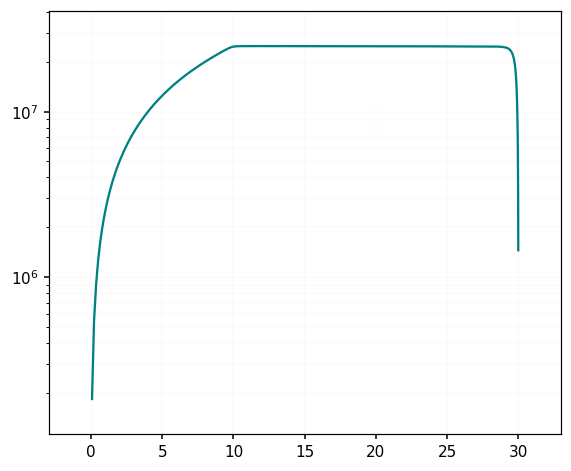

In [46]:
t_e = ds['Te'][2:-2]
x = ds['pos'][2:-2]


q = spitzer_electron_simple(ds)
q = q[2:-2]

plt.plot(x, q)
plt.yscale('log')